# Second Model

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Import local plottin gmodules
import sys
sys.path.append('../src')
import eval_plots

# Setting the random seed for reproducability
np.random.seed(123)

### Setting up the Image Data Flow

In [2]:
# Initialize folder paths to split data
train_folder = '../data/split/train/'

test_folder = '../data/split/test/'

val_folder = '../data/split/validation/'

In [3]:
# set up batch generator for train set with 1000 as the batch size
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(100, 100), 
        batch_size = 32,
        class_mode='binary',
        shuffle=False)

# set up batch generator for test set with 1000 as the batch size
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(100, 100), 
        batch_size = 32,
        class_mode='binary',
        shuffle=False) 

# set up batch generator for validation set with 1000 as the batch size
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(100, 100), 
        batch_size = 32,
        class_mode='binary',
        shuffle=False)


Found 48684 images belonging to 2 classes.
Found 16229 images belonging to 2 classes.
Found 16228 images belonging to 2 classes.


In [4]:
# Creating admin tools for the models like automatic saving checkpoints, early stopping routines, etc.
checkpoint = ModelCheckpoint("./test_models/second.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)

early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=4,
                      verbose=1,
                      mode='auto')



### Functions for various models to try

In [5]:
def second_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))



    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    opt = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)# 
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    print(model.summary())
    return model

In [6]:
# set the model as the first simple model
model = second_model()

# Fit the model to the train data
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    callbacks=[checkpoint,early],
                    )#class_weight=weights


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [7]:
# Test results of the Model on train data 
loss_train,accuracy_train = model.evaluate(train_generator)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

508/508 [==============================] - 68s 135ms/step - loss: 0.5148 - acc: 0.7663
Model has an accuracy of 0.7662681937217712 with a loss of 0.5148163437843323 on the train subset.


In [8]:
# Test results of the Model on test data
loss_test,accuracy_test = model.evaluate(test_generator)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

508/508 [==============================] - 126s 248ms/step - loss: 0.5094 - acc: 0.7663
Model has an accuracy of 0.7662825584411621 with a loss of 0.5093934535980225 on the test subset.


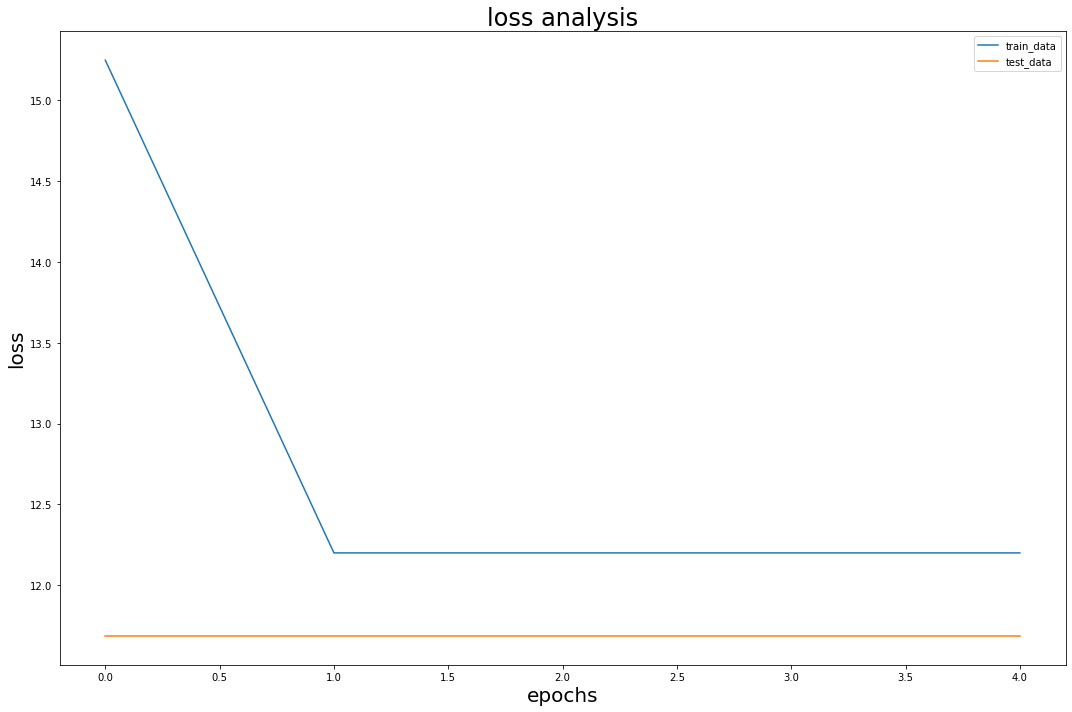

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
# fig.savefig('second_model_loss.png')
plt.show()

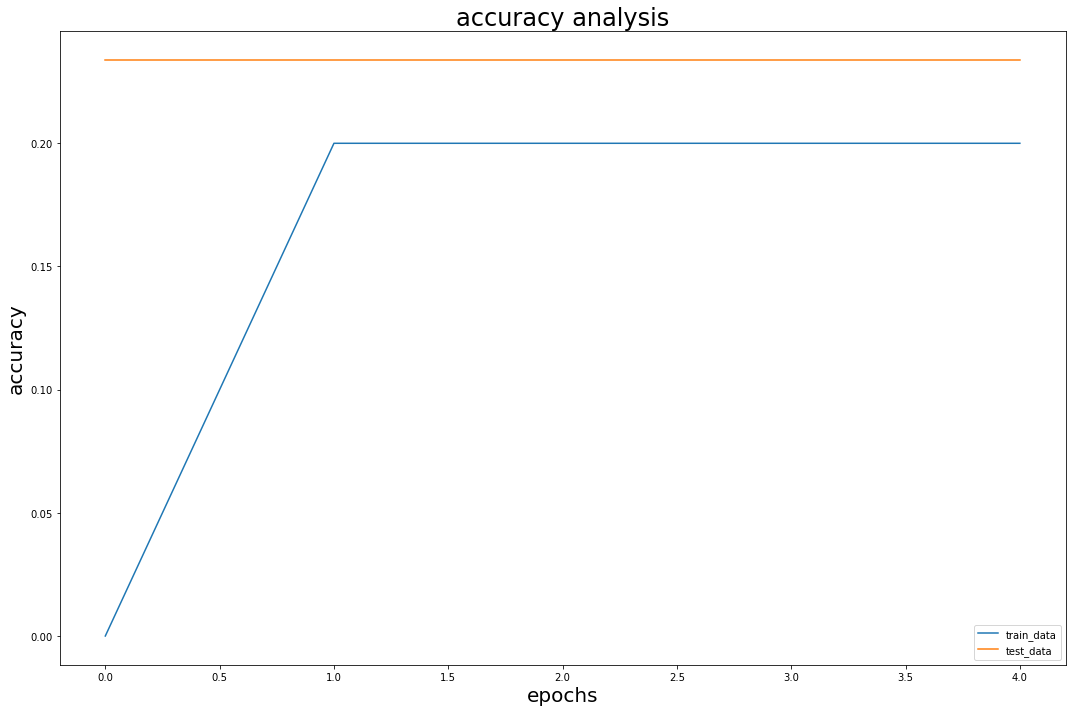

In [8]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
# fig.savefig('effNetB0_acc.png')
plt.show()

Found 16229 images belonging to 2 classes.


<ipython-input-9-b1c765ec5c8b>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  eval_plots.plot_rocs(models_dict,test_data_path).show()


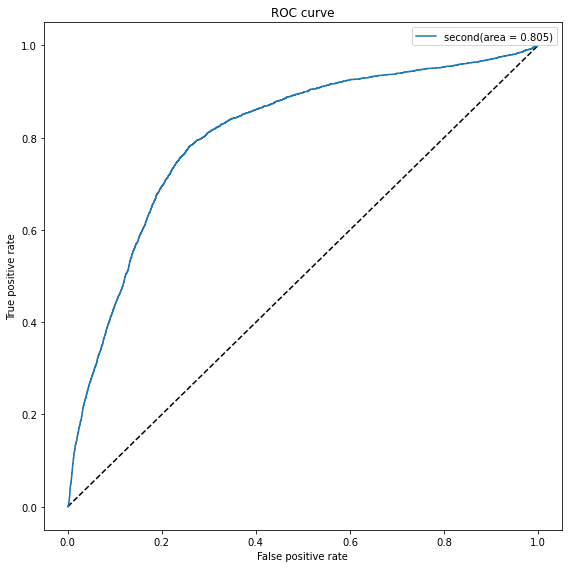

In [9]:
# Plotting the Reciever Operating Curve
models_dict = {'second':[load_model('second.h5'),(100,100)]}
test_data_path = '../data/split/test'
eval_plots.plot_rocs(models_dict,test_data_path).show()

#### The Accuracy is lower than indicated in the modeling. The above metrics seem correct as the data has a large imballance in favor of IDC-negative. A model that would give a negative prediction would be correct about 66% of the time.

## Second Model Regularized


In [10]:
# Creating admin tools for the models like automatic saving checkpoints, early stopping routines, etc.
checkpoint = ModelCheckpoint("second_reg.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)

early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=4,
                      verbose=1,
                      mode='auto')

In [16]:
def second_reg():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    
    model.add(layers.Conv2D(64, (3, 3), activation='relu',\
        kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu',\
        kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu',\
        kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))    
    
    opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    
    print(model.summary())
    return model

In [17]:
# set the model as the first simple model
model2 = second_reg()

# Fit the model to the train data
history = model2.fit(train_generator,
                    epochs = 20,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    callbacks=[checkpoint,early],
                    )#

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)        

## Evaluation

In [14]:
# Test results of the Model on train data 
loss_train,accuracy_train = model2.evaluate(train_generator)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

1522/1522 [==============================] - 110s 72ms/step - loss: 3.0692 - acc: 0.7663
Model has an accuracy of 0.766288697719574 with a loss of 3.0691609382629395 on the train subset.


In [15]:
# Test results of the Model on test data
loss_test,accuracy_test = model2.evaluate(test_generator)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

508/508 [==============================] - 37s 73ms/step - loss: 3.0685 - acc: 0.7663
Model has an accuracy of 0.7662825584411621 with a loss of 3.0685224533081055 on the test subset.


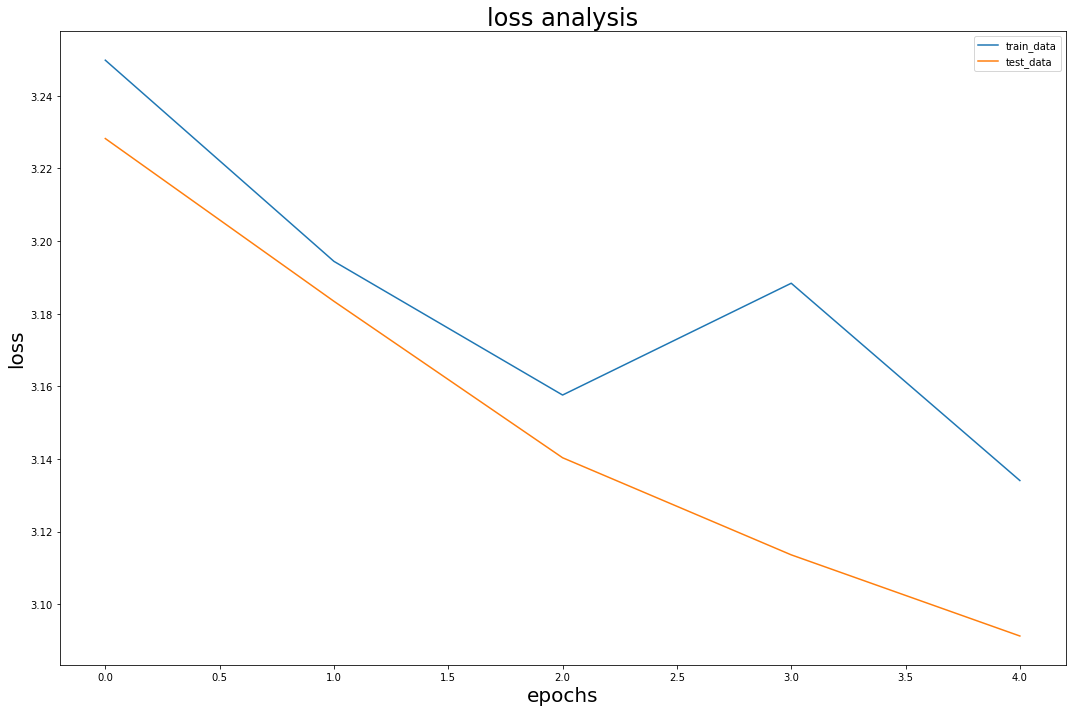

In [18]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
# fig.savefig('effNetB0_loss.png')

plt.show()

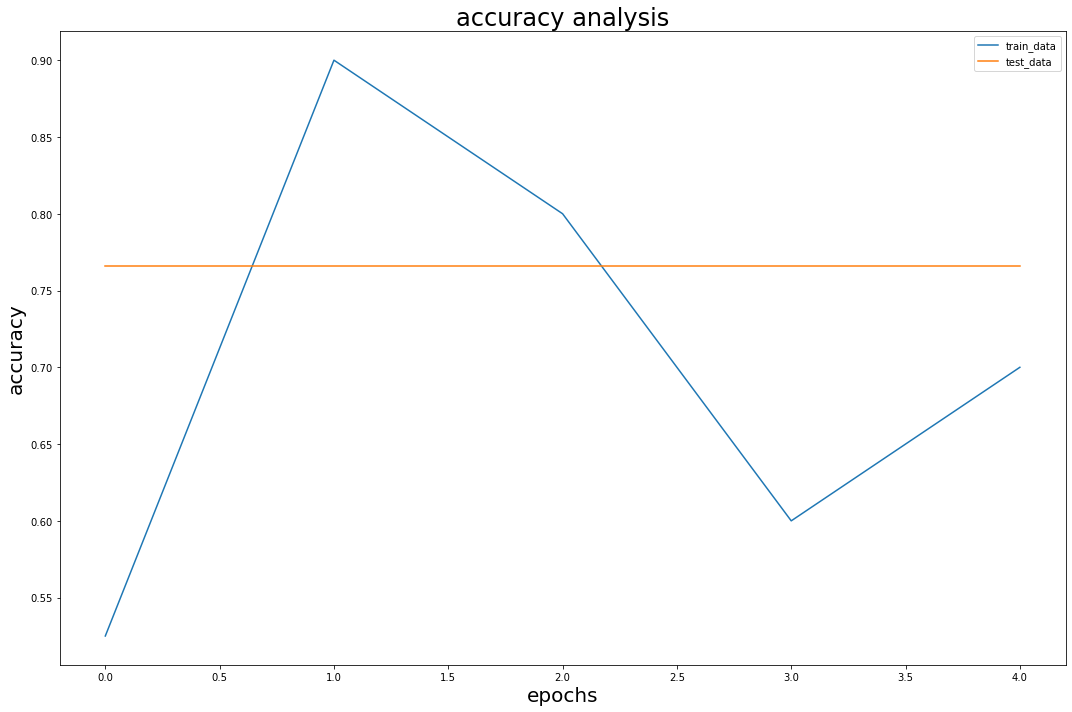

In [19]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
# fig.savefig('effNetB0_acc.png')
plt.show()

Found 16229 images belonging to 2 classes.


<ipython-input-20-9931363cb4f6>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  eval_plots.plot_rocs(models_dict,test_data_path).show()


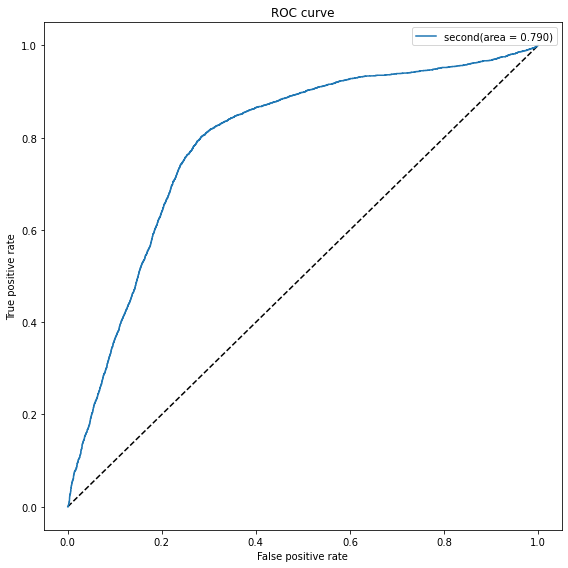

In [20]:
# Plotting the Reciever Operating Curve
models_dict = {'second':[model2,(100,100)]}
test_data_path = '../data/split/test'
eval_plots.plot_rocs(models_dict,test_data_path).show()